# 1.证明题

推导并证明：在对数线性回归模型中，因变量的期望公式为：

$$E(y) = exp(X^{T}\beta + \sigma^2/2)$$

证明：

对数线性模型的基本假设为：$lny = X^{T}\beta + \epsilon$,其中$\epsilon$满足球型(正态)假设$\epsilon \sim N(0, \sigma^2 I_n)$

因此y服从多维的对数正态分布，即$y \sim LN(X^{T}\beta , \sigma^2 I_n)$ 

又因为对数正态分布$LN(\mu, \sigma^2)$的期望为$e^{\mu + \frac{\sigma^2}{2}}$

因此可以推出结论：

$$E(y) = exp(X^{T}\beta + \sigma^2/2)$$

证毕

# 2.金融行业岗位分析及算法实现

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## （1）数据读入与数据概览

In [2]:
df = pd.read_excel('financejob.xlsx')
df.head(10)

,company,nature,size,sector,position,descrip,salary,education,experience
0,盛世投资集团,民营,20-99人,"基金,证券,期货,投资",文化执行董事,岗位职责潜在LP挖掘及转化 潜在合作渠道开发及转化 分析文化行业投资机会，寻找和洽谈潜在投资...,25000.5,不限,不限
1,北京东扬国际投资管理有限公司,民营,100-499人,"基金,证券,期货,投资",文员助理,岗位职责1起草和修改报告文稿等；2及时准确的更新员工通讯录；管理公司网络邮箱；3负责日常办...,9000.5,不限,不限
2,盈创置地北京投资有限公司,合资,20-99人,"基金,证券,期货,投资",物业公司总经理_唐山_,职位描述 1根据集团发展战略，全面实施物业公司的经营方针，主持物业公司的日常生产...,40000.5,大专,5_10年
3,首创证券有限责任公司,股份制企业,500-999人,"基金,证券,期货,投资",固定收益事业部_发行项目承做,岗位职责1 项目承揽阶段，协助开展客户开发和项目承接工作，制作项目建议书等；2 项目实施阶段...,9000.5,硕士及以上,1_3年
4,北京友财投资管理有限公司,民营,20-99人,"基金,证券,期货,投资",债权投资助理,岗位职责1寻找项目投资机会，包括债权和股权项目；2项目分析，包括对接融资方企业尽调项目分析上...,9000.5,本科,1_3年
5,鸿亿投资管理北京有限公司,股份制企业,10000人以上,"基金,证券,期货,投资",总裁,岗位职责1跟进公司新项目的进度，保证项目高效率高质量的完成；2熟悉企业管理，有连锁酒店经营管...,75000.0,不限,不限
6,紫石资本投资管理有限公司,民营,20人以下,"基金,证券,期货,投资",投资经理_助理,岗位职责1负责项目行业信息的收集整理行业研究报告的撰写以及相关政策收集分析；2协助完成项目的...,7000.5,本科,1_3年
7,高瑞北京投资基金管理有限公司,民营,100-499人,"基金,证券,期货,投资",投资助理,岗位职责1 协助投资负责人寻找潜在投资机会；2 协助投资负责人完成尽职调查基金募集说明书及项...,9000.5,本科,1_3年
8,亿盛嘉德北京投资管理有限公司,合资,100-499人,"基金,证券,期货,投资",通州万达 诚聘外汇操盘手 零基础可培训,当今世界已经进入了金融时代，理财成为了人们必须掌握的一项基本技能。作为金融届的新宠儿外汇 因...,12500.5,大专,不限
9,智邦北京投资基金有限公司,股份制企业,20-99人,"基金,证券,期货,投资",投资助理,岗位职责1协助投资总监对行业完成调研分析，并形成行业研究报告；2协助投资总监对项目投资基金发...,5000.5,本科,1_3年


## （2）薪资对数变换

In [3]:
df['lnsalary'] = np.log(df['salary'])
df.head(10)

,company,nature,size,sector,position,descrip,salary,education,experience,lnsalary
0,盛世投资集团,民营,20-99人,"基金,证券,期货,投资",文化执行董事,岗位职责潜在LP挖掘及转化 潜在合作渠道开发及转化 分析文化行业投资机会，寻找和洽谈潜在投资...,25000.5,不限,不限,10.126651
1,北京东扬国际投资管理有限公司,民营,100-499人,"基金,证券,期货,投资",文员助理,岗位职责1起草和修改报告文稿等；2及时准确的更新员工通讯录；管理公司网络邮箱；3负责日常办...,9000.5,不限,不限,9.105035
2,盈创置地北京投资有限公司,合资,20-99人,"基金,证券,期货,投资",物业公司总经理_唐山_,职位描述 1根据集团发展战略，全面实施物业公司的经营方针，主持物业公司的日常生产...,40000.5,大专,5_10年,10.596647
3,首创证券有限责任公司,股份制企业,500-999人,"基金,证券,期货,投资",固定收益事业部_发行项目承做,岗位职责1 项目承揽阶段，协助开展客户开发和项目承接工作，制作项目建议书等；2 项目实施阶段...,9000.5,硕士及以上,1_3年,9.105035
4,北京友财投资管理有限公司,民营,20-99人,"基金,证券,期货,投资",债权投资助理,岗位职责1寻找项目投资机会，包括债权和股权项目；2项目分析，包括对接融资方企业尽调项目分析上...,9000.5,本科,1_3年,9.105035
5,鸿亿投资管理北京有限公司,股份制企业,10000人以上,"基金,证券,期货,投资",总裁,岗位职责1跟进公司新项目的进度，保证项目高效率高质量的完成；2熟悉企业管理，有连锁酒店经营管...,75000.0,不限,不限,11.225243
6,紫石资本投资管理有限公司,民营,20人以下,"基金,证券,期货,投资",投资经理_助理,岗位职责1负责项目行业信息的收集整理行业研究报告的撰写以及相关政策收集分析；2协助完成项目的...,7000.5,本科,1_3年,8.853737
7,高瑞北京投资基金管理有限公司,民营,100-499人,"基金,证券,期货,投资",投资助理,岗位职责1 协助投资负责人寻找潜在投资机会；2 协助投资负责人完成尽职调查基金募集说明书及项...,9000.5,本科,1_3年,9.105035
8,亿盛嘉德北京投资管理有限公司,合资,100-499人,"基金,证券,期货,投资",通州万达 诚聘外汇操盘手 零基础可培训,当今世界已经进入了金融时代，理财成为了人们必须掌握的一项基本技能。作为金融届的新宠儿外汇 因...,12500.5,大专,不限,9.433524
9,智邦北京投资基金有限公司,股份制企业,20-99人,"基金,证券,期货,投资",投资助理,岗位职责1协助投资总监对行业完成调研分析，并形成行业研究报告；2协助投资总监对项目投资基金发...,5000.5,本科,1_3年,8.517293


## （3）对数薪资直方图

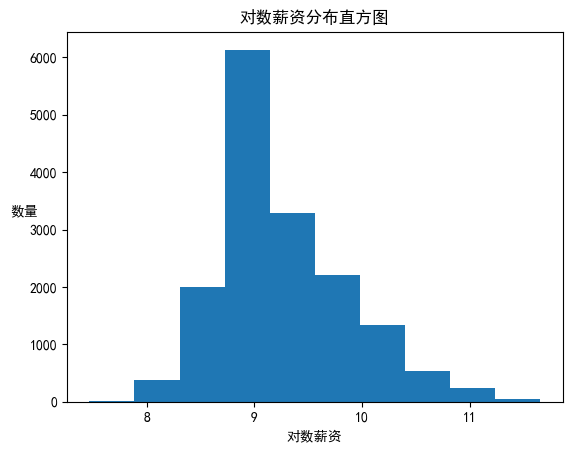

In [4]:
plt.hist(df['lnsalary'])
plt.title('对数薪资分布直方图')
plt.xlabel('对数薪资')
plt.ylabel('数量',rotation='horizontal')
plt.show()

分析解读：金融行业薪资呈现向右拖尾的右偏分布，多数群体对数薪资在9左右（实际薪资在7000-9000的范围），不过高薪个体数量也比较多。

## （4）公司属性-薪资箱线图

首先检查一下有哪些中公司属性：

In [5]:
df['nature'].value_counts()

民营       5913
股份制企业    4281
合资       2835
国企       1803
上市公司      585
外商独资      396
其他        382
Name: nature, dtype: int64

总共有民营、股份制企业、合资、国企、上市公司、外商独资和其他七种公司属性。如下绘制箱线图

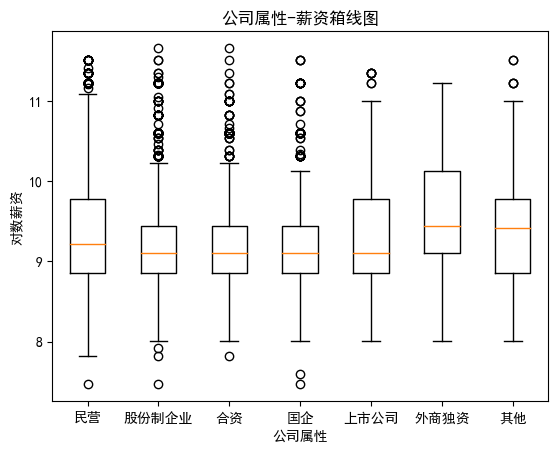

In [6]:
names = df['nature'].value_counts().keys()
box = list()
for name in names:
    box.append(df[df['nature'] == name]['lnsalary'])
ax = plt.subplot()
ax.boxplot(box)
ax.set_xticklabels(names)
plt.xlabel('公司属性')
plt.ylabel('对数薪资')
plt.title('公司属性-薪资箱线图')
plt.show()

分析解读： \
从箱线图的箱宽可以看出，在金融岗位中，股份制企业、合资、国企这三种公司属性对应的薪资分布相对比较集中，而民营、上市公司、外商独资这三种公司属性对应的薪资分布比较分散 \
从箱线图的高低对比可以看出，在金融岗位中，外商独资和其他公司的平均薪资高，民营公司的平均水平也较高。相比之下，股份制企业、合资、国企、上市公司的平均薪资水平就较为一般。

## （5）薪资线性回归分析

自变量共有公司属性、公司规模、公司行业大类、学历、经验五列自变量，对这五列可能存在脏数据的列进行清洗。

In [7]:
# 首先对可能的脏数据进行清洗
print(df['nature'].value_counts())
print(df['size'].value_counts())
print(df['sector'].value_counts())
print(df['education'].value_counts())
print(df['experience'].value_counts())

民营       5913
股份制企业    4281
合资       2835
国企       1803
上市公司      585
外商独资      396
其他        382
Name: nature, dtype: int64
100-499人      5788
20-99人        2900
500-999人      2829
1000-9999人    2485
10000人以上      1771
20人以下          422
Name: size, dtype: int64
基金,证券,期货,投资    13543
保险              1656
信托,担保,拍卖,典当      569
银行               427
Name: sector, dtype: int64
本科       6623
大专       5603
不限       3147
硕士及以上     822
Name: education, dtype: int64
不限       8129
1_3年     3138
3_5年     2514
5_10年    1467
1年以下      407
无经验       269
10年以上     267
1年以上        3
2年以上        1
Name: experience, dtype: int64


可以看到在经验列中出现了“1年以上”的类别和“2年以上”的类别，由于他们不能被归并到其他的类别，所以这里选择保留而不是直接去掉。

定义函数，将类别变量列转化为哑变量，同时注意基准组的设置

In [8]:
def to_dummy(df, name, base_class):
    all_class = list(df.value_counts(name).keys())
    all_class.remove(base_class)
    df[[name + '_' +item for item in all_class]] = 0
    for id in df.index:
        class_name = df.loc[id, name]
        if class_name in all_class:
            df.loc[id, name+ '_'+ class_name] = 1
    return df

In [9]:
df = to_dummy(df, 'nature', '国企')
df = to_dummy(df, 'size', '20人以下')
df = to_dummy(df, 'sector', '银行')
df = to_dummy(df, 'education', '本科')
df = to_dummy(df, 'experience', '1_3年')
df.head(10)

,company,nature,size,sector,position,descrip,salary,education,experience,lnsalary,...,education_不限,education_硕士及以上,experience_不限,experience_3_5年,experience_5_10年,experience_1年以下,experience_无经验,experience_10年以上,experience_1年以上,experience_2年以上
0,盛世投资集团,民营,20-99人,"基金,证券,期货,投资",文化执行董事,岗位职责潜在LP挖掘及转化 潜在合作渠道开发及转化 分析文化行业投资机会，寻找和洽谈潜在投资...,25000.5,不限,不限,10.126651,...,1,0,1,0,0,0,0,0,0,0
1,北京东扬国际投资管理有限公司,民营,100-499人,"基金,证券,期货,投资",文员助理,岗位职责1起草和修改报告文稿等；2及时准确的更新员工通讯录；管理公司网络邮箱；3负责日常办...,9000.5,不限,不限,9.105035,...,1,0,1,0,0,0,0,0,0,0
2,盈创置地北京投资有限公司,合资,20-99人,"基金,证券,期货,投资",物业公司总经理_唐山_,职位描述 1根据集团发展战略，全面实施物业公司的经营方针，主持物业公司的日常生产...,40000.5,大专,5_10年,10.596647,...,0,0,0,0,1,0,0,0,0,0
3,首创证券有限责任公司,股份制企业,500-999人,"基金,证券,期货,投资",固定收益事业部_发行项目承做,岗位职责1 项目承揽阶段，协助开展客户开发和项目承接工作，制作项目建议书等；2 项目实施阶段...,9000.5,硕士及以上,1_3年,9.105035,...,0,1,0,0,0,0,0,0,0,0
4,北京友财投资管理有限公司,民营,20-99人,"基金,证券,期货,投资",债权投资助理,岗位职责1寻找项目投资机会，包括债权和股权项目；2项目分析，包括对接融资方企业尽调项目分析上...,9000.5,本科,1_3年,9.105035,...,0,0,0,0,0,0,0,0,0,0
5,鸿亿投资管理北京有限公司,股份制企业,10000人以上,"基金,证券,期货,投资",总裁,岗位职责1跟进公司新项目的进度，保证项目高效率高质量的完成；2熟悉企业管理，有连锁酒店经营管...,75000.0,不限,不限,11.225243,...,1,0,1,0,0,0,0,0,0,0
6,紫石资本投资管理有限公司,民营,20人以下,"基金,证券,期货,投资",投资经理_助理,岗位职责1负责项目行业信息的收集整理行业研究报告的撰写以及相关政策收集分析；2协助完成项目的...,7000.5,本科,1_3年,8.853737,...,0,0,0,0,0,0,0,0,0,0
7,高瑞北京投资基金管理有限公司,民营,100-499人,"基金,证券,期货,投资",投资助理,岗位职责1 协助投资负责人寻找潜在投资机会；2 协助投资负责人完成尽职调查基金募集说明书及项...,9000.5,本科,1_3年,9.105035,...,0,0,0,0,0,0,0,0,0,0
8,亿盛嘉德北京投资管理有限公司,合资,100-499人,"基金,证券,期货,投资",通州万达 诚聘外汇操盘手 零基础可培训,当今世界已经进入了金融时代，理财成为了人们必须掌握的一项基本技能。作为金融届的新宠儿外汇 因...,12500.5,大专,不限,9.433524,...,0,0,1,0,0,0,0,0,0,0
9,智邦北京投资基金有限公司,股份制企业,20-99人,"基金,证券,期货,投资",投资助理,岗位职责1协助投资总监对行业完成调研分析，并形成行业研究报告；2协助投资总监对项目投资基金发...,5000.5,本科,1_3年,8.517293,...,0,0,0,0,0,0,0,0,0,0


线性回归模型、训练、显示变量对应的系数

In [10]:
y = df[df.columns[9:10]]
x = df[df.columns[10:]]
model = LinearRegression()
model.fit(x, y)
print('截距：',model.intercept_)
pd.DataFrame({'变量': df.columns[10:], '系数': model.coef_[0]})

截距： [9.08964123]


,变量,系数
0,nature_民营,0.086191
1,nature_股份制企业,0.092561
2,nature_合资,0.173784
3,nature_上市公司,0.132920
4,nature_外商独资,0.238696
5,nature_其他,0.094681
6,size_100-499人,-0.060700
7,size_20-99人,-0.068602
8,size_500-999人,-0.033302
9,size_1000-9999人,-0.084003


从上部分的系数中可以看出，由于基准组的系数相当于是0，可以比较出每种类别变量之间不同取值对于薪资影响的强弱关系。 \
比如以公司属性为例，国企、民营、股份制企业、合资、上市公司、外商公司、其他的系数分别为 0、0.086、0.093、0.174、0.133、0.239、0.095 \
因此从定量的角度上讲，薪资由高到低是外商公司、合资、上市公司、其他、股份制企业、国企。这和箱线图得到的结论也基本一致。

## （6）BIC变量选择

BIC公式为：$-2L(B) + (log N)d$，这里$L(B)$是似然函数，N为样本量，d是维度数量

可以尝试通过向前选择的方式，每次新加入一个特征使得BIC最小

In [11]:
candicate = list(df.columns[10:])
features = list()
N = len(df)
for i in range(len(candicate)):
    bic_min = 10 ** 20
    for j in candicate:
        features_tmp = features + [j]
        d = len(features_tmp)
        L = LinearRegression().fit(df[features_tmp], y).score(df[features_tmp], y)
        bic = -3000 * L + np.log(N) * d
        if bic < bic_min:
            bic_min = bic
            best_candicate = j
    features.append(best_candicate)
    candicate.remove(best_candicate)
    print(best_candicate, bic_min)

experience_5_10年 -357.3335440046429
experience_10年以上 -554.7643797787772
experience_3_5年 -714.7787753444845
education_大专 -786.3104324596675
size_10000人以上 -805.0641008271962
education_硕士及以上 -809.9966658759039
nature_合资 -813.6842292255146
sector_基金,证券,期货,投资 -809.9928795638028
education_不限 -805.3049868777937
nature_外商独资 -800.6942571973082
experience_无经验 -793.9507923780114
size_500-999人 -785.5597916707304
nature_上市公司 -777.087735539555
nature_股份制企业 -768.3985473305501
nature_民营 -761.4352332082439
nature_其他 -753.0079804259539
experience_1年以下 -743.7950151424534
experience_不限 -734.7596988114832
size_1000-9999人 -725.4750740725794
sector_信托,担保,拍卖,典当 -716.2838785894927
sector_保险 -706.9724499221749
experience_2年以上 -697.5842097110103
size_20-99人 -688.048294208089
size_100-499人 -679.0623691748484
experience_1年以上 -669.4037576032616


可以看到使用Forward-stepwise-selection运用BIC准则（但是将似然函数给予了一个1500倍的扩大，否则选择一个变量BIC最小），在选择至第七个特征时BIC达到最小值 \
因此使用BIC得到最佳特征组合为【experience_5_10年，experience_10年以上，experience_3_5年，education_大专，size_10000人以上，education_硕士及以上，nature_合资】

## 补充：

这里的似然函数L，我使用了常数倍的R2来替代。在这里证明一下二者的等价性：

似然函数$L = \Pi_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} exp(-\frac{(y_i - x_i \beta)^2}{2\sigma^2})$

对数似然函数$L2 = -k_1 \Sigma_{i=1}^n (y_i - x_i \beta)^2 +k_2$ 

= $-k_1 SSE + k_2 \cdots (1)$

,$k_1 k_2$为常数且有$k_1 > 0$

而R2得分 $R_2\_score = 1 - \frac{SSE}{SST}$

 = $-k_3 SSE + k_4 \cdots(2)$

,$k_3 k_4$为常数且有$k_1 > 0$

结合$(1)(2)$即证明了二者的等价性

## （7）BIC选择后模型五折交叉验证+模型评估

如下所示，特征选为BIC模型选择得到的七个特征，进行五折交叉验证，得到五组adjusted_R2_score如下。 \
之前在拟合的时候，R2得分约为0.3，目前交叉验证也在0.3左右，说明模型的泛化能力达标。 \
但是adjusted R2 score = 0.3并不高，建模效果并不是非常理想。

In [12]:
y = df[df.columns[9:10]]
selected_features = ['experience_5_10年','experience_10年以上','experience_3_5年','education_大专','size_10000人以上','education_硕士及以上','nature_合资']
x = df[selected_features] # BIC选择得到七个特征
length = len(df)
R2_list = list()
for k in range(5):
    xval = x.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
    yval = y.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
    xup = x.iloc[0:int(k/5 * length), :]
    xdown = x.iloc[int((k+ 1)/5 * length):, :]
    xtrain = pd.concat([xup, xdown])
    yup = y.iloc[0:int(k/5 * length), :]
    ydown = y.iloc[int((k+ 1)/5 * length):, :]
    ytrain = pd.concat([yup, ydown])
    ypre = LinearRegression().fit(xtrain, ytrain).predict(xval)
    n = len(yval)
    p = len(selected_features)
    r2 = r2_score(yval, ypre) # R2 score
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) # adjusted R2 score
    R2_list.append(adjusted_r2)
R2_list

[0.32081930828942273,
 0.19105154200255292,
 0.29256380559406436,
 0.2821123504157317,
 0.30615323027197416]